# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np

In [63]:
zillow_df = pd.read_csv('zillow_data.csv')
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
len(zillow_df['RegionName'].unique())

14723

# Step 2: Data Preprocessing

In [4]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [5]:
zillow_df = melt_data(zillow_df)

In [6]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
value    265 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


# Step 3: EDA and Visualization

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


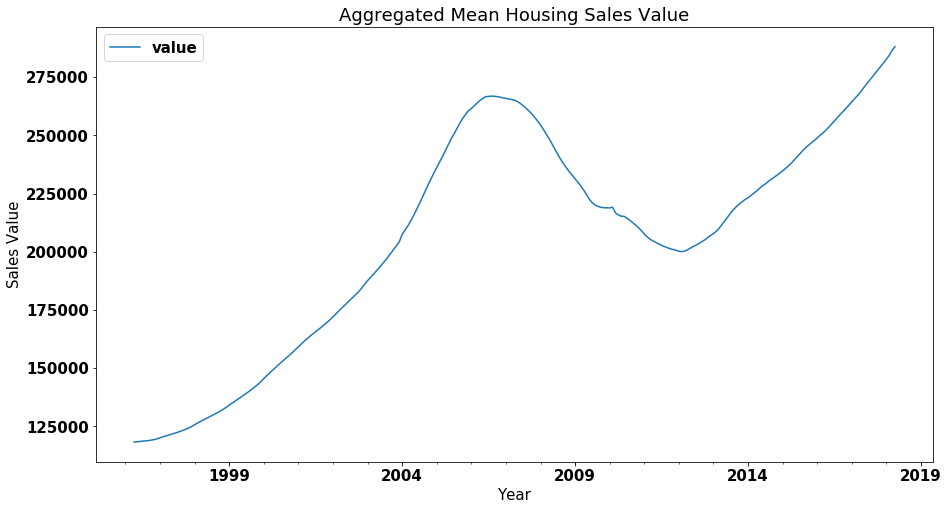

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

zillow_df.plot(figsize=(15,8))
plt.title("Aggregated Mean Housing Sales Value")
plt.xlabel("Year")
plt.ylabel("Sales Value")
plt.legend(loc=2)
plt.show()

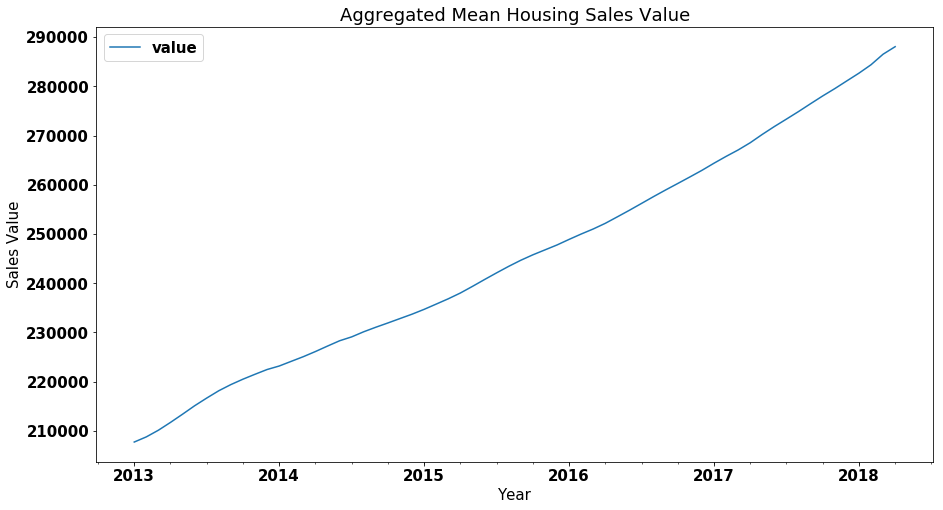

In [8]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

onwards_2013 = zillow_df['2013-01-01':]

onwards_2013.plot(figsize=(15,8))
plt.title("Aggregated Mean Housing Sales Value")
plt.xlabel("Year")
plt.ylabel("Sales Value")
plt.legend(loc=2)
plt.show()

# Step 4: Assessing Trends

In [9]:
rolmean = onwards_2013.rolling(window = 12, center = False).mean()
rolstd = onwards_2013.rolling(window = 12, center = False).std()

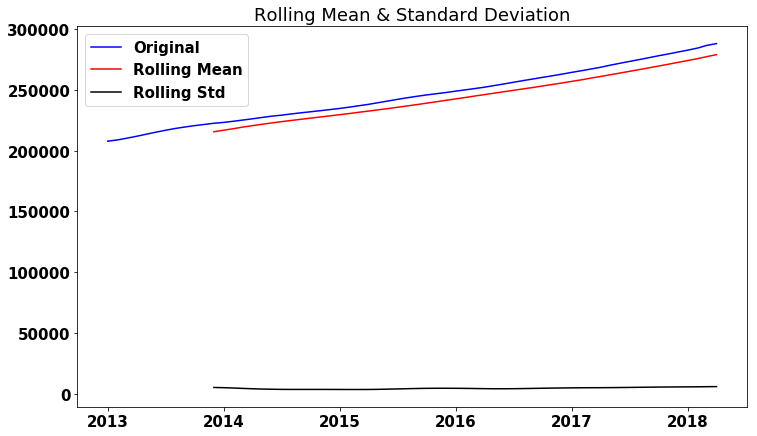

In [10]:
fig = plt.figure(figsize=(12,7))
orig = plt.plot(onwards_2013, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(onwards_2013['value'])

print ('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.265949
p-value                         0.996411
#Lags Used                      1.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


Given that the test-statistic is larger than the critical value (0.05), we fail to reject the null hypothesis. Therefore, the data is not stationary.

# Step 5: Removing Trends

### Substracting the WMA

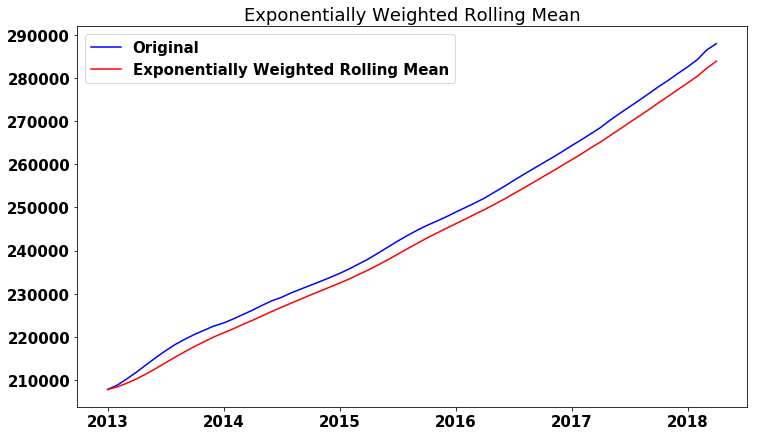

In [40]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = onwards_2013['value'].ewm(halflife = 2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(onwards_2013, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean')
plt.show(block=False)

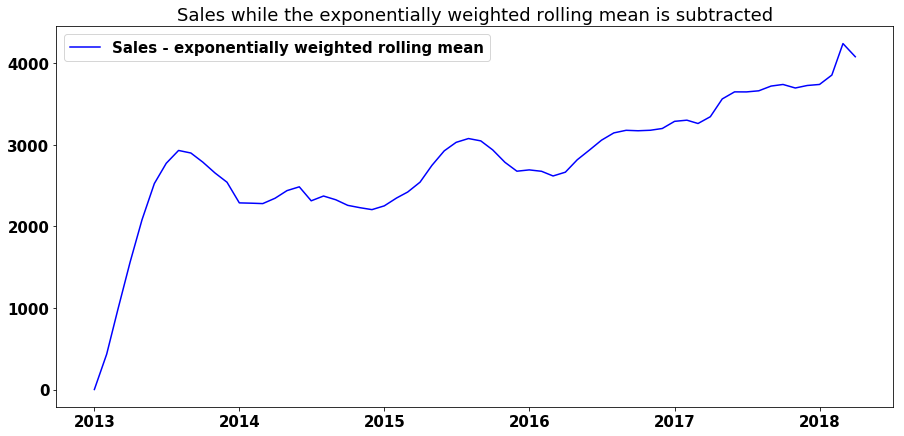

In [44]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = onwards_2013['value'] - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(15,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Sales - exponentially weighted rolling mean')
plt.legend(loc='best')
plt.title('Sales while the exponentially weighted rolling mean is subtracted')
plt.show(block=False)

In [43]:
dftest = adfuller(data_minus_exp_rolmean)

print ('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  0.512248
p-value                         0.985241
#Lags Used                      7.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


Substracting the exponential rolling mean from the original dataset didn't help make the data stationary. As we can see from the results of the Dick-Fuller test, the test-statistic is larger than the critical value (0.05), so we fail to reject the null hypothesis. Therefore, the data is not stationary.

### Differencing

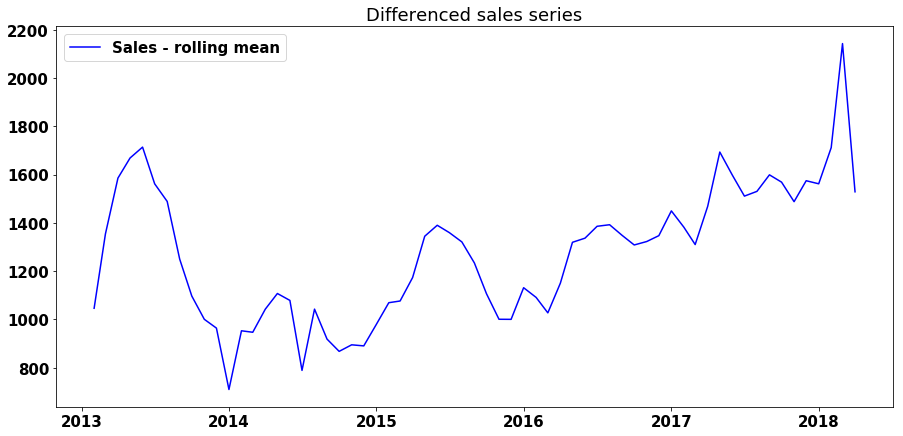

In [37]:
data_diff = onwards_2013.diff(periods=1)
data_diff.head(10)

fig = plt.figure(figsize=(15,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [48]:
data_diff.dropna(inplace=True)
dftest = adfuller(data_diff['value'])

print ('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.951168
p-value                         0.308386
#Lags Used                      1.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


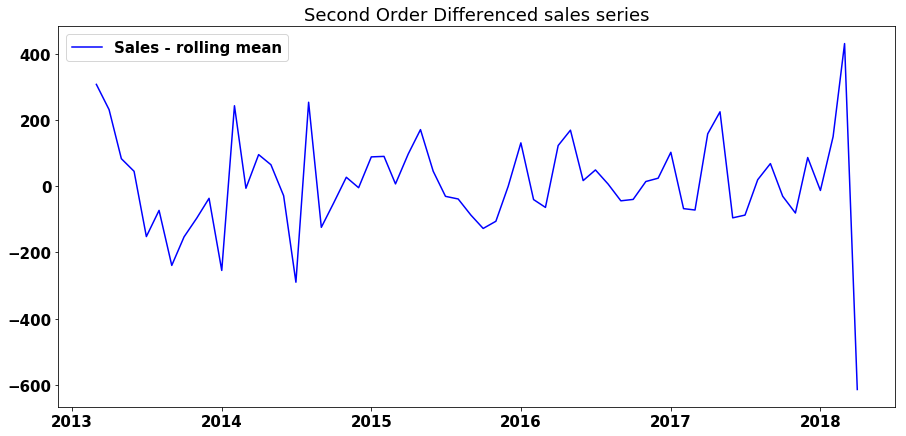

In [51]:
data_diff_second_order = data_diff.diff(periods=1)
data_diff.head(10)

fig = plt.figure(figsize=(15,7))
plt.plot(data_diff_second_order, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Second Order Differenced sales series')
plt.show(block=False)

In [50]:
data_diff_second_order.dropna(inplace=True)
dftest = adfuller(data_diff_second_order['value'])

print ('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.838682e+00
p-value                        3.822648e-07
#Lags Used                     1.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


# Step 6: Decomposition Trends

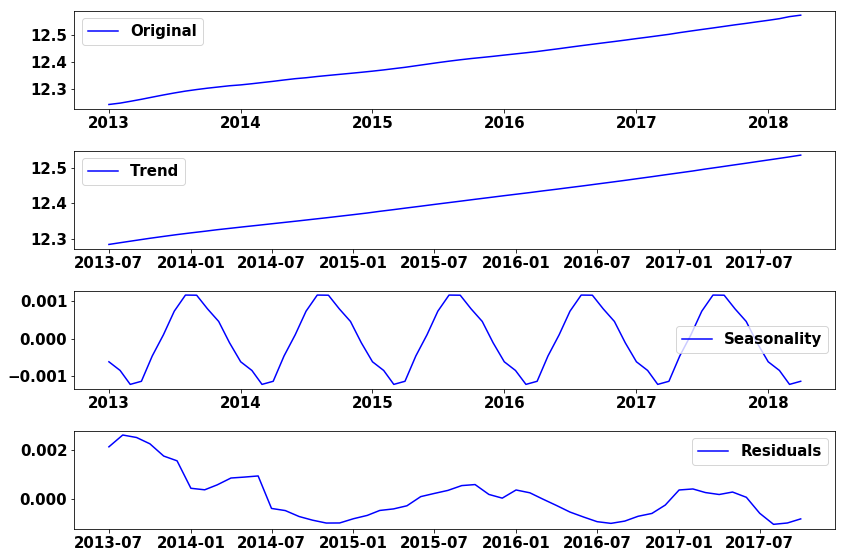

In [15]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(onwards_2013))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(onwards_2013), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

**The plot above clearly shows the upwards trend of our data, along with its yearly seasonality.**

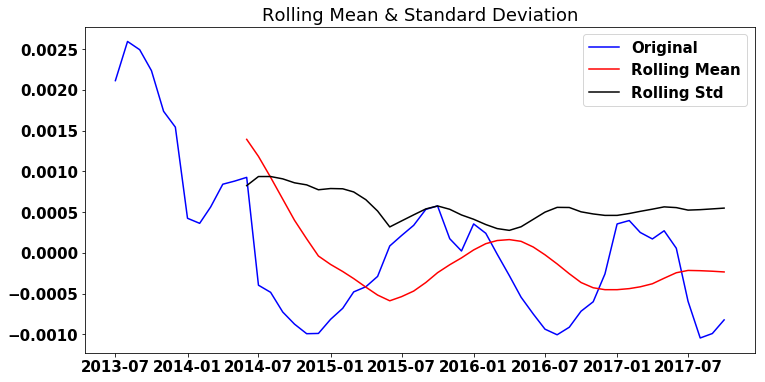

Results of Dickey-Fuller Test:
Test Statistic                 -2.066506
p-value                         0.258194
#Lags Used                      6.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [16]:
onwards_2012_log_decompose = residual
onwards_2012_log_decompose.dropna(inplace=True)

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 12, center = False).mean()
    rolstd = TS.rolling(window = 12, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value']) 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

stationarity_check(residual)

**The Dickey-Fuller test statistic is significant and very below a 0.05 mark. So it seems reasonable to assume this time series is stationary.**

# Step 5: ARIMA Modeling

In [ ]:
Scenario one: Bull market (consists of the zipcodes which will generate the highest returns)
    
Scenario two: Stable market (consists of the zipcodes which will generate average returns)
    
Scenario three: Bear market (consists of the zipcodes which will generate the most stable returns)

In [ ]:
ann_return = observations.apply(lambda y: y.apply(lambda x: x+1))
ann_return = (ann_return.prod() ** (np.min(12/len(ann_return.index.values)) if len(ann_return.index.values) > 12 else 12/len(ann_return.index.values)))-1

In [60]:
zillow_df['2013-01']
zillow_df['2014-01']

,value
time,
2014-01-01,223183.2072


In [ ]:
def annualized_returns(TS):
    onwards_2013 = zillow_df['2013-01-01':]
    year_start_returns = []
    for i in zillow_df
    
    
    
    

In [62]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('RegionID', ).aggregate({'value':'mean'})

In [66]:
x = melt_data(zillow_df)

In [69]:
x.groupby('RegionID').aggregate({'value':'mean'})

,value
RegionID,
58196,174509.811321
58197,273152.452830
58200,172650.943396
58201,217938.113208
58202,175319.622642
58204,198326.037736
58205,135570.566038
58207,138181.132075
58209,148291.320755


# Step 6: Interpreting Results

In [65]:
len(zillow_df['RegionName'].unique())

14723